<a href="https://colab.research.google.com/github/AmirMohaddesi/LLTP/blob/master/LunarLander_Trajectory_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install dependancies, takes around 45 seconds

Rendering Dependancies



In [0]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

Pacman Dependancies

In [0]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[box2d] > /dev/null 2>&1

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (46.0.0)


# Imports and Helper functions


In [0]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
%tensorflow_version 2.x
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1007'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1007'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

# Pacman!

In [0]:
!apt install swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
!pip3 install box2d box2d-kengz

In [0]:
# for _ in range(1):
#   env = wrap_env(gym.make("LunarLander-v2"))

#   observation = env.reset()

#   while True:

  

#     action = env.action_space.sample()
#     observation,reward,done,info = env.step(action)

#     if done:
#       break;

#   env.close()
#   show_video()

In [0]:
#check out the pacman action space!
# print(env.action_space)

In [0]:
import torch
import torch.utils.data
import tqdm
import numpy as np
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import pylab as plt
import torchvision
from torch.utils.data import Dataset
from PIL import Image
import os.path
import os
import cv2
from pathlib import Path

In [0]:
!rm -r Train/
!rm -r Test/
!mkdir Train/
!mkdir Test/

In [0]:
def find_files(root, extensions):
    for ext in extensions:
        yield from Path(root).glob(f'**/*.{ext}')

LunarLanders = 50;

for LunarLanderId in range(LunarLanders):
  os.mkdir('Train/'+str(LunarLanderId));
  env = wrap_env(gym.make("LunarLander-v2"))

  observation = env.reset()

  while True:

    action = env.action_space.sample()
    observation,reward,done,info = env.step(action)

    if done:
      break;

  env.close()
  show_video()
  movie = ''
  for movie in find_files(Path.cwd()/'video', ['mp4']):
      print(movie)

  vidcap = cv2.VideoCapture(str(movie))
  success,image = vidcap.read()
  count = 0
  while vidcap.isOpened():
        success, image = vidcap.read()
        if success:
            cv2.imwrite("Train/" +str(LunarLanderId) + "/frame" + str(count)+".jpg", image)     # save frame as JPEG file      
            success,image = vidcap.read()
            # print('Read a new frame: ', success)
            count += 1
        else:
            break

LunarLanders = 10;

for LunarLanderId in range(LunarLanders):
  os.mkdir('Test/'+str(LunarLanderId));
  env = wrap_env(gym.make("LunarLander-v2"))

  observation = env.reset()

  while True:

    action = env.action_space.sample()
    observation,reward,done,info = env.step(action)

    if done:
      break;

  env.close()
  show_video()
  movie = ''
  for movie in find_files(Path.cwd()/'video', ['mp4']):
      print(movie)

  vidcap = cv2.VideoCapture(str(movie))
  success,image = vidcap.read()
  count = 0
  while vidcap.isOpened():
        success, image = vidcap.read()
        if success:
            cv2.imwrite("Test/" +str(LunarLanderId) + "/frame" + str(count)+".jpg", image)     # save frame as JPEG file      
            success,image = vidcap.read()
            # print('Read a new frame: ', success)
            count += 1
        else:
            break

/content/video/openaigym.video.0.4138.video000000.mp4


/content/video/openaigym.video.1.4138.video000000.mp4


/content/video/openaigym.video.2.4138.video000000.mp4


/content/video/openaigym.video.3.4138.video000000.mp4


/content/video/openaigym.video.4.4138.video000000.mp4


/content/video/openaigym.video.5.4138.video000000.mp4


/content/video/openaigym.video.6.4138.video000000.mp4


/content/video/openaigym.video.7.4138.video000000.mp4


/content/video/openaigym.video.8.4138.video000000.mp4


/content/video/openaigym.video.9.4138.video000000.mp4


/content/video/openaigym.video.10.4138.video000000.mp4


/content/video/openaigym.video.11.4138.video000000.mp4


/content/video/openaigym.video.12.4138.video000000.mp4


/content/video/openaigym.video.13.4138.video000000.mp4


/content/video/openaigym.video.14.4138.video000000.mp4


/content/video/openaigym.video.15.4138.video000000.mp4


/content/video/openaigym.video.16.4138.video000000.mp4


/content/video/openaigym.video.17.4138.video000000.mp4


/content/video/openaigym.video.18.4138.video000000.mp4


/content/video/openaigym.video.19.4138.video000000.mp4


/content/video/openaigym.video.20.4138.video000000.mp4


/content/video/openaigym.video.21.4138.video000000.mp4


/content/video/openaigym.video.22.4138.video000000.mp4


/content/video/openaigym.video.23.4138.video000000.mp4


/content/video/openaigym.video.24.4138.video000000.mp4


/content/video/openaigym.video.25.4138.video000000.mp4


/content/video/openaigym.video.26.4138.video000000.mp4


/content/video/openaigym.video.27.4138.video000000.mp4


/content/video/openaigym.video.28.4138.video000000.mp4


/content/video/openaigym.video.29.4138.video000000.mp4


/content/video/openaigym.video.30.4138.video000000.mp4


/content/video/openaigym.video.31.4138.video000000.mp4


/content/video/openaigym.video.32.4138.video000000.mp4


/content/video/openaigym.video.33.4138.video000000.mp4


/content/video/openaigym.video.34.4138.video000000.mp4


/content/video/openaigym.video.35.4138.video000000.mp4


/content/video/openaigym.video.36.4138.video000000.mp4


/content/video/openaigym.video.37.4138.video000000.mp4


/content/video/openaigym.video.38.4138.video000000.mp4


/content/video/openaigym.video.39.4138.video000000.mp4


/content/video/openaigym.video.40.4138.video000000.mp4


/content/video/openaigym.video.41.4138.video000000.mp4


/content/video/openaigym.video.42.4138.video000000.mp4


/content/video/openaigym.video.43.4138.video000000.mp4


/content/video/openaigym.video.44.4138.video000000.mp4


/content/video/openaigym.video.45.4138.video000000.mp4


/content/video/openaigym.video.46.4138.video000000.mp4


/content/video/openaigym.video.47.4138.video000000.mp4


/content/video/openaigym.video.48.4138.video000000.mp4


/content/video/openaigym.video.49.4138.video000000.mp4


/content/video/openaigym.video.50.4138.video000000.mp4


/content/video/openaigym.video.51.4138.video000000.mp4


/content/video/openaigym.video.52.4138.video000000.mp4


/content/video/openaigym.video.53.4138.video000000.mp4


/content/video/openaigym.video.54.4138.video000000.mp4


/content/video/openaigym.video.55.4138.video000000.mp4


/content/video/openaigym.video.56.4138.video000000.mp4


/content/video/openaigym.video.57.4138.video000000.mp4


/content/video/openaigym.video.58.4138.video000000.mp4


/content/video/openaigym.video.59.4138.video000000.mp4


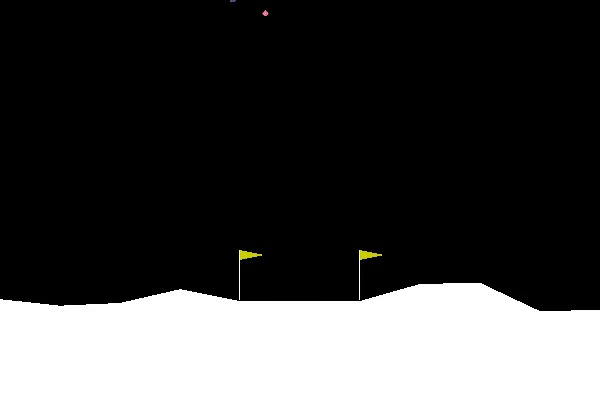

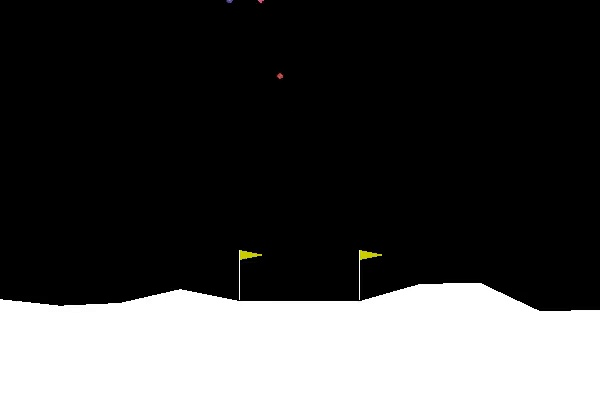

In [0]:
from google.colab.patches import cv2_imshow
idx = 10
data = [];
img = cv2.imread("Train/0/frame" +str(idx)+".jpg")
img1 = cv2.imread("Train/0/frame" +str(idx+1)+".jpg")
data.append(img);
data.append(img1)
cv2_imshow(data[0])
cv2_imshow(data[1])

In [0]:
class MyTrainingDataset(Dataset):
    def __init__(self, root, transform=None, target_transform=None):
        self.root = root
        self.transform = transform
        self.target_transform = target_transform
        self.data = []
        count = 0;
        folder = 0;
        endlist_count = 0
        self.end_list = []
        img = True;
        while(img is not None):
          while(img is not None):
            if(os.path.exists(str(root)+str(folder)+"/frame"+str(count)+".jpg")):
              img = Image.open(str(root)+str(folder)+"/frame"+str(count)+".jpg")
            else:
              img = None
            count = count+1;
            if img is not None:
              # img = np.reshape(img,(3,400,600))
              self.data.append(img)
              endlist_count = endlist_count+1;
          count = 0;
          folder = folder + 1
          if(os.path.exists(str(root)+str(folder)+"/frame"+str(count)+".jpg")):
            img = Image.open(str(root)+str(folder)+"/frame"+str(count)+".jpg")
          else:
            img = None
          count = count+1;
          if img is not None:
            # img = np.reshape(img,(3,400,600))
            self.data.append(img)
            endlist_count = endlist_count+1;
          self.end_list.append(endlist_count)
          

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        if idx+1 in self.end_list:
          target = self.data[idx]
        else:
          target = self.data[idx+1]
        if self.transform:
          sample = self.transform(sample)
          target = self.transform(target)

        return sample, target

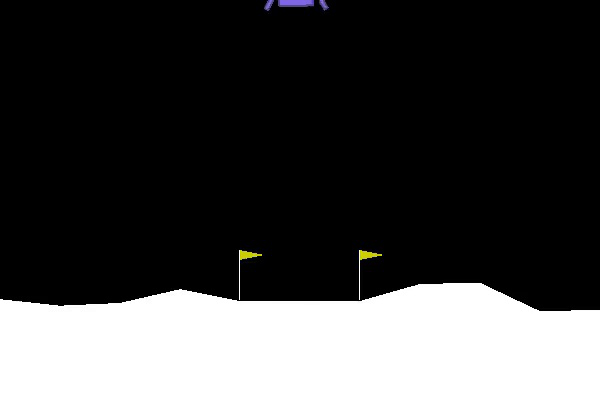

In [0]:
image = Image.open("Train/0/"+"/frame0"+".jpg")
image

In [0]:
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(64),
   transforms.CenterCrop(64),
   transforms.ToTensor(),
  #  normalize
])

traindata = MyTrainingDataset("Train/",transform = preprocess)
train_loader = torch.utils.data.DataLoader(traindata,batch_size=1, shuffle=True)

testdata = MyTrainingDataset("Test/",transform = preprocess)
test_loader = torch.utils.data.DataLoader(testdata,batch_size=1, shuffle=False)
x ,t= next(iter(train_loader))
# print(x.view(45,3,400,600).shape)


In [0]:
traindata[0][1]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [0]:
class Reshape(nn.Module):
    def __init__(self, *args):
        super(Reshape, self).__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)

In [0]:
class ConvAE(torch.nn.Module):
    def __init__(self, dimz=50):
        super(ConvAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 5, 1),
            nn.MaxPool2d(3,2),
            nn.ReLU(True),
            nn.Conv2d(16, 24, 5, 1),
            nn.ReLU(True), 
            nn.Conv2d(24, 32, 5, 1, padding=2),
            nn.MaxPool2d(3,2), 
            nn.ReLU(True), 
            nn.Flatten(),
            nn.Linear(4608, dimz))
        self.decoder = nn.Sequential(
            nn.Linear(dimz, 4608),
            nn.ReLU(True),
            Reshape(-1,32,12,12),
            nn.ConvTranspose2d(32, 24, 5, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(24, 12, 5, stride=1),
            nn.ReLU(True), 
            nn.ConvTranspose2d(12, 3, 3, stride=2,output_padding=1), 
            # nn.Tanh()
            )
        self.dimz=dimz
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
net = ConvAE().cuda()
opt = optim.Adam(net.parameters(), lr=1e-3)

In [0]:
def ae_loss(y, x, z):
    x = x.reshape(*y.shape)
    mse = F.mse_loss(y, x, reduction='mean')# + 5e-2*torch.mean(abs(z))
    return mse

In [0]:
def train_step(x, net, opt_fn, loss_fn):
    net.train()
    z = net.encoder(x)
    y = net.decoder(z)
    loss = loss_fn(y, x, z)
    loss.backward()
    opt_fn.step()
    opt_fn.zero_grad()
    return loss.data

In [0]:
def test_step(x, net, loss_fn):
    with torch.no_grad(): #This speeds up evaluation by ignoring derivatives altogether
        z = net.encoder(x)
        y = net.decoder(z)
        loss = loss_fn(y, x, z)       
        return loss.data


In [0]:
loss_hist_train = []
loss_hist_test = []
for epoch in range(10):
    net.train()
    loss_batch = []
    for x,t in tqdm.tqdm(iter(train_loader)):  
        # x = x.view(-1,400*600*3) #Remove if convnet
        x = x.float()
        loss_ = train_step(x.cuda(), net, opt, ae_loss)
        # print(loss_)
        loss_batch.append(loss_.detach().cpu().numpy())
    loss_hist_train.append(np.mean(loss_batch))   

    net.eval()
    loss_batch = []
    for x,t in tqdm.tqdm(iter(test_loader)): 
        # x = x.view(-1,400*600*3) #Remove if convnet
        x = x.float()
        loss_ = test_step(x.cuda(), net, ae_loss)
        loss_batch.append(loss_.detach().cpu().numpy())
    loss_hist_test.append(np.mean(loss_batch))
    print(loss_hist_test[-1])

  0%|          | 11/2236 [00:00<00:21, 103.42it/s]

0.011598625


  0%|          | 9/2236 [00:00<00:26, 83.56it/s]

0.010200079


  0%|          | 9/2236 [00:00<00:27, 81.56it/s]

0.009891678


  0%|          | 10/2236 [00:00<00:24, 91.58it/s]

0.010067523


  0%|          | 9/2236 [00:00<00:28, 79.42it/s]

0.009693546


  0%|          | 9/2236 [00:00<00:25, 86.58it/s]

0.009720296


  0%|          | 8/2236 [00:00<00:30, 73.87it/s]

0.009785151


  0%|          | 9/2236 [00:00<00:26, 84.94it/s]

0.010299739


  0%|          | 9/2236 [00:00<00:27, 82.02it/s]

0.00964859


100%|██████████| 427/427 [00:02<00:00, 203.86it/s]

0.009443246


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


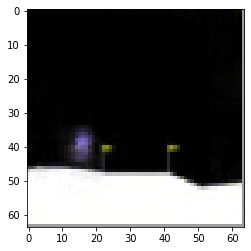

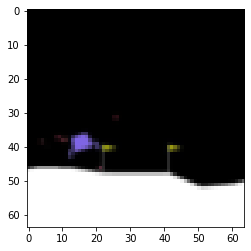

In [0]:
x,t = next(iter(train_loader))
x = x.float().cuda()
z = net.encoder(x)
y = net.decoder(z)
a = y.cpu()
b = x.cpu()
# print(np.array(a[0].detach()).transpose(1,2,0))
plt.imshow(np.array(a[0].detach()).transpose(1,2,0))
plt.figure(2)
plt.imshow(np.array(b[0].detach()).transpose(1,2,0))

In [0]:
loss_hist_test

[0.011598625,
 0.010200079,
 0.009891678,
 0.010067523,
 0.009693546,
 0.009720296,
 0.009785151,
 0.010299739,
 0.00964859,
 0.009443246]

#Random Z demonstration

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


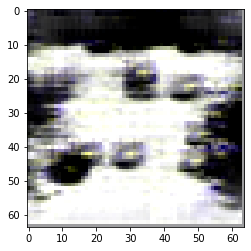

In [0]:
a = torch.randn_like(z)
b = net.decoder(a)
b = b.cpu()
plt.imshow(np.array(b[0].detach()).transpose(1,2,0))


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!touch saved.pt

In [0]:
torch.save(net.state_dict(),'/content/saved.pt')

In [0]:
!cp saved.pt drive/My\ Drive

In [0]:
net = ConvAE();
net.load_state_dict(torch.load('/content/drive/My Drive/saved.pt'))


<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


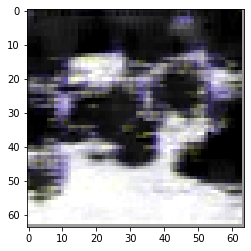

In [0]:
net = net.cuda()
x,t = next(iter(train_loader))
x = x.float().cuda()
z = net.encoder(x)
a = torch.randn_like(z)
b = net.decoder(a)
b = b.cpu()
plt.imshow(np.array(b[0].detach()).transpose(1,2,0))


In [0]:
class SimpleRNN(nn.Module):
    def __init__(self, nhid=200):
        super(SimpleRNN, self).__init__()
        self.nhid = nhid
        self.ff = nn.Linear(50, nhid)
        self.rec = nn.Linear(nhid, nhid)
        self.out = nn.Linear(nhid,50)

    def forward(self, x, h):
        a = self.ff(x)+self.rec(h)
        ht = torch.tanh(a)
        return self.out(ht), ht
    
    def init_state(self, batch_size):
        return torch.zeros([batch_size, self.nhid])

In [0]:
rnn = SimpleRNN().cuda()
opt = optim.Adam(rnn.parameters(), lr=1e-3)

In [0]:
def loss_fn(x, t):
    return F.mse_loss(x,t)

In [0]:
def train_step(x, t, net, opt_fn, loss_fn):
    #expects x of shape [time, batch, data] 
    net.train()
    batch_size = x.shape[0]
    ht = net.init_state(batch_size).to(x.device)
    for xt in x:
        y, ht = net(xt, ht)
    loss = loss_fn(y, t)
    loss.backward()
    opt_fn.step()
    opt_fn.zero_grad()
    return y.data, loss.data

In [0]:
def test_step(x, t, net, loss_fn):
    net.eval()
    batch_size = x.shape[0]
    with torch.no_grad(): #This speeds up evaluation by ignoring derivatives altogether
        ht = net.init_state(batch_size).to(x.device)
        batch_size = x.shape[0]
        for xt in x: 
            y, ht = net(xt, ht)
        loss = loss_fn(y, t)
        return y, loss.data 

In [0]:
acc_hist_train = []
acc_hist_test = []
for epoch in range(5):
    acc_batch = []
    for x,t in iter(train_loader):   
        x = net.encoder(x.float().cuda())
        t = net.encoder(t.float().cuda())
        y, loss_ = train_step(x, t, rnn, opt, loss_fn)
        # print(loss_)
        # acc_batch.append(torch.mean((t == y[-1].cpu().argmax(1)).float()))
    # acc_hist_train.append(torch.mean(torch.FloatTensor(acc_batch)))   

    acc_batch = []
    for x,t in iter(test_loader):   
        x = net.encoder(x.float().cuda())
        t = net.encoder(t.float().cuda())
        y, loss_ = test_step(x, t, rnn, loss_fn)
        print(loss_)
    #     acc_batch.append(torch.mean((t == y[-1].cpu().argmax(1)).float()))
    # acc_hist_test.append(torch.mean(torch.FloatTensor(acc_batch)))  
    # print(acc_hist_test[-1])

tensor(0.0011, device='cuda:0')
tensor(0.0015, device='cuda:0')
tensor(0.0012, device='cuda:0')
tensor(0.0013, device='cuda:0')
tensor(0.0015, device='cuda:0')
tensor(0.0019, device='cuda:0')
tensor(0.0022, device='cuda:0')
tensor(0.0016, device='cuda:0')
tensor(0.0021, device='cuda:0')
tensor(0.0029, device='cuda:0')
tensor(0.0022, device='cuda:0')
tensor(0.0021, device='cuda:0')
tensor(0.0028, device='cuda:0')
tensor(0.0022, device='cuda:0')
tensor(0.0029, device='cuda:0')
tensor(0.0020, device='cuda:0')
tensor(0.0022, device='cuda:0')
tensor(0.0020, device='cuda:0')
tensor(0.0020, device='cuda:0')
tensor(0.0021, device='cuda:0')
tensor(0.0015, device='cuda:0')
tensor(0.0014, device='cuda:0')
tensor(0.0037, device='cuda:0')
tensor(0.0021, device='cuda:0')
tensor(0.0017, device='cuda:0')
tensor(0.0025, device='cuda:0')
tensor(0.0028, device='cuda:0')
tensor(0.0034, device='cuda:0')
tensor(0.0030, device='cuda:0')
tensor(0.0035, device='cuda:0')
tensor(0.0052, device='cuda:0')
tensor(0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 50])
torch.Size([1, 50])


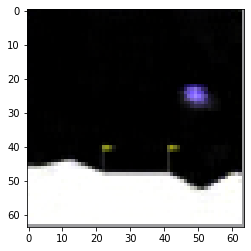

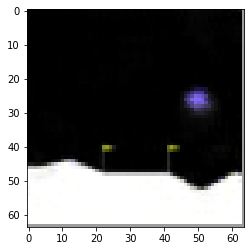

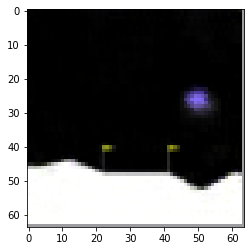

In [0]:
x,t = next(iter(train_loader))
x = x.float().cuda()
z = net.encoder(x)
x = net.decoder(z)
b = x.cpu()
plt.figure(1)
plt.imshow(np.array(b[0].detach()).transpose(1,2,0))
batch_size = x.shape[0]
ht = rnn.init_state(batch_size).to(x.device)
print(z.shape)

zpost , ht = rnn(z,ht)
print(zpost.shape)
xpost = net.decoder(zpost)
bpost = xpost.cpu()
plt.figure(2)
plt.imshow(np.array(bpost[0].detach()).transpose(1,2,0))
t = t.float().cuda()
z = net.encoder(t)
t = net.decoder(z)
a = t.cpu()
plt.figure(3)
plt.imshow(np.array(a[0].detach()).transpose(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

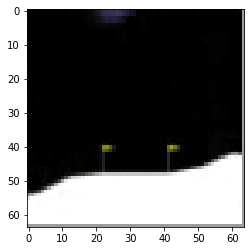

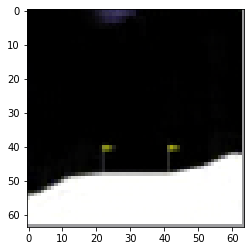

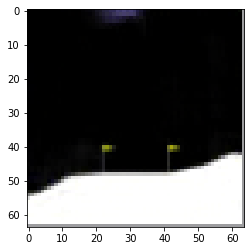

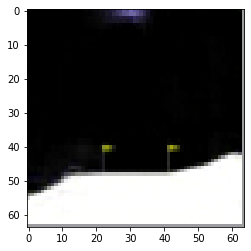

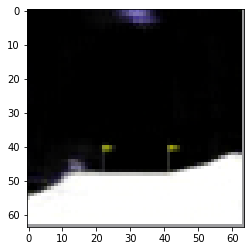

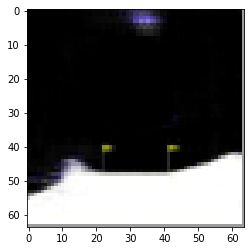

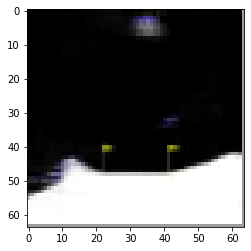

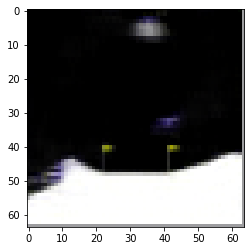

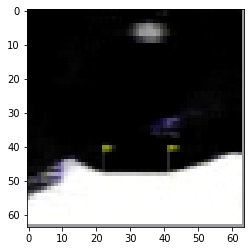

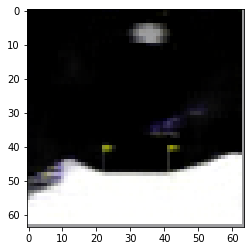

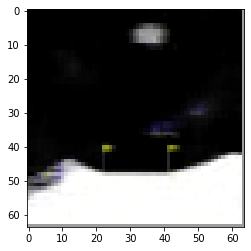

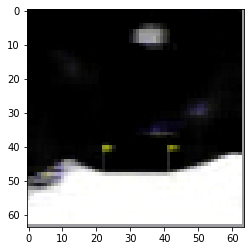

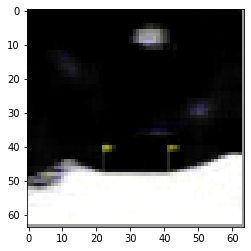

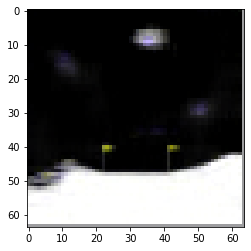

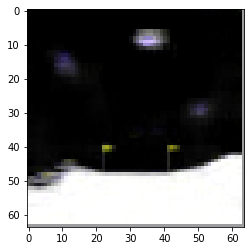

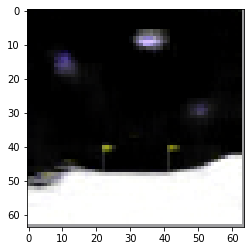

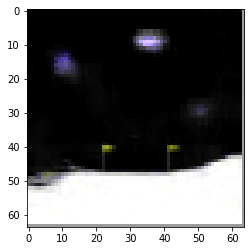

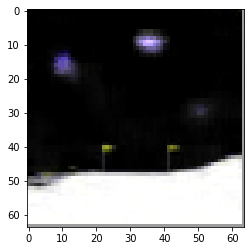

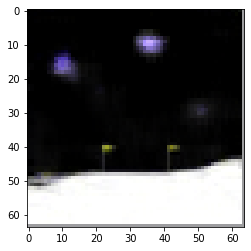

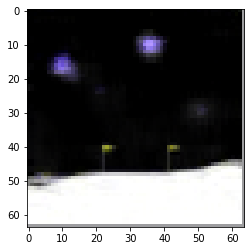

In [0]:
x,t = next(iter(train_loader))
x = x.float().cuda()
b = x.cpu()
plt.figure(1)
plt.imshow(np.array(b[0].detach()).transpose(1,2,0))
z = net.encoder(x)
for i in range(20):
  batch_size = x.shape[0]
  ht = rnn.init_state(batch_size).to(x.device)
  zpost , ht = rnn(z,ht)
  xpost = net.decoder(zpost)
  bpost = xpost.cpu()
  plt.figure(i+1)
  plt.imshow(np.array(bpost[0].detach()).transpose(1,2,0))
  z = zpost
